## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import scipy.stats as sp
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading Data

In [2]:
data = pd.ExcelFile('Case_study_data.xlsx')
active=pd.read_excel(data,sheet_name=0)
churned=pd.read_excel(data,sheet_name=1)

In [3]:
active.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [4]:
churned.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


### Dropping columns not needed in the training set

In [5]:
active.drop(['FIRST_COMMUNICATION_DATE','DATE_OF_BIRTH','EMAIL_ADDRESS','ADDRESS','FIRST_NAME','LAST_NAME','ZIPCODE','STATE','CITY'],axis=1,inplace=True)

In [6]:
churned.drop(['FIRST_COMMUNICATION_DATE','DATE_OF_BIRTH','CHURN_DATE','EMAIL_ADDRESS','ADDRESS','FIRST_NAME','LAST_NAME','ZIPCODE','STATE','CITY'],axis=1,inplace=True)

In [7]:
total_churned = churned.isnull().sum()
print(total_churned)

SITE_ACCOUNT_NUMBER             0
ACCOUNT_STATUS                 15
UPGRADE_DATE                  879
SERVICE_PLAN                 1482
MODEL                         710
SALES_CHANNEL                2602
DIRECT_INDIRECT_CHANNEL       784
SALES_SOURCE                  290
COMPANY_SOURCE_NAME             8
FEEDBACK                     2028
SATELLITE                    1013
SITE_TYPE_DESC                 63
WARRANTY_NAME                 681
MOST_RECENT_SALES_CHANNEL      21
GENDER                       1238
AGE                             8
INCOME                          0
MARITAL_STATUS                281
PRESENCE_OF_CHILDREN         1252
COMPUTER_OWNER               3243
dtype: int64


In [8]:
percent_churned = ((total_churned/churned.isnull().count())*100)

In [9]:
missing_churned_columns = pd.concat([total_churned, percent_churned], axis=1, keys=['Total', 'Percent'])
missing_churned_columns

,Total,Percent
SITE_ACCOUNT_NUMBER,0,0.00
ACCOUNT_STATUS,15,0.15
UPGRADE_DATE,879,8.79
SERVICE_PLAN,1482,14.82
MODEL,710,7.10
SALES_CHANNEL,2602,26.02
DIRECT_INDIRECT_CHANNEL,784,7.84
SALES_SOURCE,290,2.90
COMPANY_SOURCE_NAME,8,0.08
FEEDBACK,2028,20.28


In [10]:
active.rename(columns={'SERVICE_ PLAN':'SERVICE_PLAN'},inplace=True)

In [11]:
total_active = active.isnull().sum()
percent_active = ((total_active/active.isnull().count())*100)

In [12]:
missing_active_columns = pd.concat([total_active, percent_active], axis=1, keys=['Total', 'Percent'])
missing_active_columns

,Total,Percent
SITE_ACCOUNT_NUMBER,1,0.010001
ACCOUNT_STATUS,1,0.010001
UPGRADE_DATE,10,0.100010
SERVICE_PLAN,1239,12.391239
MODEL,676,6.760676
SALES_CHANNEL,2906,29.062906
DIRECT_INDIRECT_CHANNEL,45,0.450045
SALES_SOURCE,693,6.930693
COMPANY_SOURCE_NAME,11,0.110011
FEEDBACK,1914,19.141914


## Imputing missing categorical values with mode.

In [13]:
active['COMPUTER_OWNER']=active['COMPUTER_OWNER'].fillna(active['COMPUTER_OWNER'].mode()[0])
active['SALES_CHANNEL']=active['SALES_CHANNEL'].fillna(active['SALES_CHANNEL'].mode()[0])
active['FEEDBACK']=active['FEEDBACK'].fillna(active['FEEDBACK'].mode()[0])
active['PRESENCE_OF_CHILDREN']=active['PRESENCE_OF_CHILDREN'].fillna(active['PRESENCE_OF_CHILDREN'].mode()[0])
active['GENDER']=active['GENDER'].fillna(active['GENDER'].mode()[0])
active['SERVICE_PLAN']=active['SERVICE_PLAN'].fillna(active['SERVICE_PLAN'].mode()[0])
active['WARRANTY_NAME']=active['WARRANTY_NAME'].fillna(active['WARRANTY_NAME'].mode()[0])
active['MODEL']= active['MODEL'].fillna(active['MODEL'].mode()[0])
active['SALES_SOURCE']=active['SALES_SOURCE'].fillna(active['SALES_SOURCE'].mode()[0])
active['MARITAL_STATUS']=active['MARITAL_STATUS'].fillna(active['MARITAL_STATUS'].mode()[0])
active['INCOME']=active['INCOME'].fillna(active['INCOME'].mode()[0])
active['SATELLITE']=active['SATELLITE'].fillna(active['SATELLITE'].mode()[0])

In [14]:
churned['COMPUTER_OWNER']=churned['COMPUTER_OWNER'].fillna(churned['COMPUTER_OWNER'].mode()[0])
churned['SALES_CHANNEL']=churned['SALES_CHANNEL'].fillna(churned['SALES_CHANNEL'].mode()[0])
churned['FEEDBACK']=churned['FEEDBACK'].fillna(churned['FEEDBACK'].mode()[0])
churned['PRESENCE_OF_CHILDREN']=churned['PRESENCE_OF_CHILDREN'].fillna(churned['PRESENCE_OF_CHILDREN'].mode()[0])
churned['GENDER']=churned['GENDER'].fillna(churned['GENDER'].mode()[0])
churned['SERVICE_PLAN']=churned['SERVICE_PLAN'].fillna(churned['SERVICE_PLAN'].mode()[0])
churned['WARRANTY_NAME']=churned['WARRANTY_NAME'].fillna(churned['WARRANTY_NAME'].mode()[0])
churned['MODEL']= churned['MODEL'].fillna(churned['MODEL'].mode()[0])
churned['SALES_SOURCE']=churned['SALES_SOURCE'].fillna(churned['SALES_SOURCE'].mode()[0])
churned['MARITAL_STATUS']=churned['MARITAL_STATUS'].fillna(churned['MARITAL_STATUS'].mode()[0])
#churned['INCOME']=churned['INCOME'].fillna(churned['INCOME'].mode()[0])
churned['SATELLITE']=churned['SATELLITE'].fillna(churned['SATELLITE'].mode()[0])
churned['DIRECT_INDIRECT_CHANNEL']=churned['DIRECT_INDIRECT_CHANNEL'].fillna(churned['DIRECT_INDIRECT_CHANNEL'].mode()[0])

In [15]:
ind_data=active.copy()
ind_data.index=ind_data['SITE_ACCOUNT_NUMBER']
ind_data.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_DATE', 'SERVICE_PLAN',
       'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')

In [16]:
churned.index=churned['SITE_ACCOUNT_NUMBER']
ind_data=pd.concat([ind_data,churned])
temp=ind_data[ind_data['UPGRADE_DATE'].isnull()==False]
temp1=ind_data[ind_data['UPGRADE_DATE'].isnull()]
temp['UPGRADE_DATE']=1

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
temp1['UPGRADE_DATE']=0

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
ind_data=pd.concat([temp,temp1])
ind_data.rename(columns={'UPGRADE_DATE':'UPGRADE_STATUS'},inplace=True)

In [19]:
temp=ind_data[(ind_data['INCOME']=='A')].replace('A',11)
ind_data.update(temp)
temp1=ind_data[(ind_data['INCOME']=='B')].replace('B',12)
ind_data.update(temp1)
temp2=ind_data[(ind_data['INCOME']=='C')].replace('C',13)
ind_data.update(temp2)
temp3=ind_data[(ind_data['INCOME']=='D')].replace('D',14)
ind_data.update(temp3)
temp4=ind_data[(ind_data['INCOME']=='E')].replace('E',15)
ind_data.update(temp4)

In [20]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
SITE_TYPE_DESC,74,0.370019
DIRECT_INDIRECT_CHANNEL,45,0.225011
MOST_RECENT_SALES_CHANNEL,28,0.140007
COMPANY_SOURCE_NAME,19,0.095005
ACCOUNT_STATUS,16,0.080004
AGE,9,0.045002
SITE_ACCOUNT_NUMBER,1,0.005000
SALES_SOURCE,0,0.000000
UPGRADE_STATUS,0,0.000000
SERVICE_PLAN,0,0.000000


In [21]:
df_copy = ind_data.copy().dropna(how='any') 
df_copy.shape

(19819, 20)

In [22]:
temp5=df_copy[(df_copy['MARITAL_STATUS']=='.')].replace('.',0.0)
df_copy.update(temp5)

In [23]:
total = df_copy.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df_copy.isnull().sum(axis=0)/df_copy.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
COMPUTER_OWNER,0,0.0
PRESENCE_OF_CHILDREN,0,0.0
ACCOUNT_STATUS,0,0.0
UPGRADE_STATUS,0,0.0
SERVICE_PLAN,0,0.0
MODEL,0,0.0
SALES_CHANNEL,0,0.0
DIRECT_INDIRECT_CHANNEL,0,0.0
SALES_SOURCE,0,0.0
COMPANY_SOURCE_NAME,0,0.0


#### Exploratory Data Analysis

In [24]:
counts=df_copy['UPGRADE_STATUS'].value_counts()

Text(0,0.5,'Number of customers')

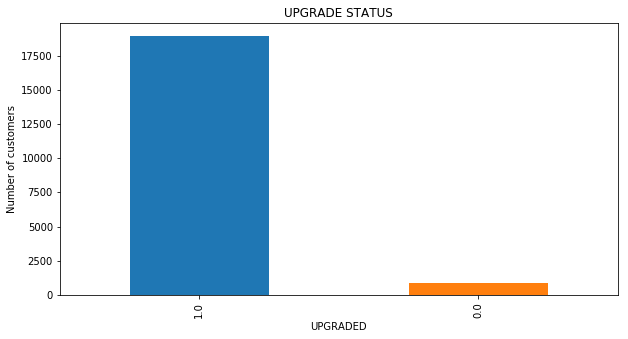

In [25]:
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title("UPGRADE STATUS")
ax.set_xlabel("UPGRADED")
ax.set_ylabel("Number of customers")

In [26]:
counts=df_copy['SERVICE_PLAN'].value_counts()

Text(0,0.5,'Number of Customers')

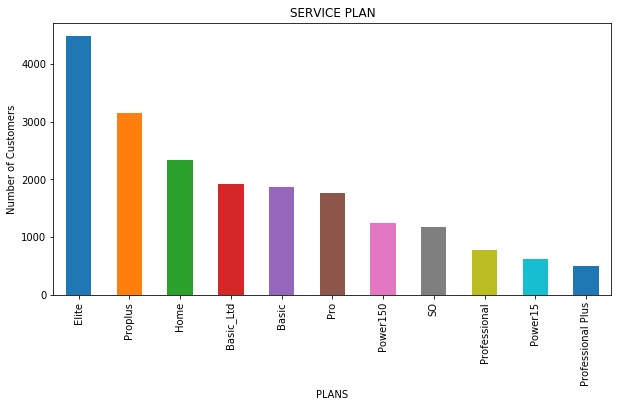

In [27]:
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title("SERVICE PLAN")
ax.set_xlabel("PLANS")
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

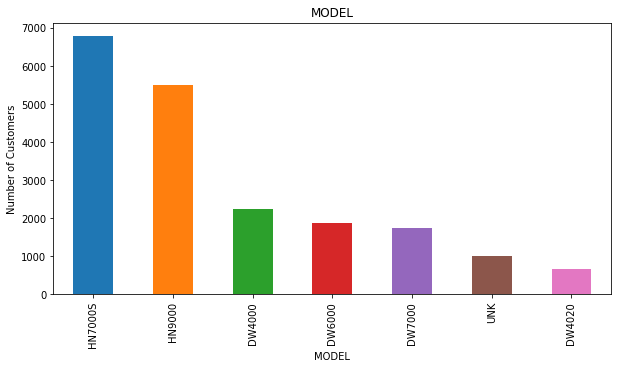

In [28]:
x="MODEL"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

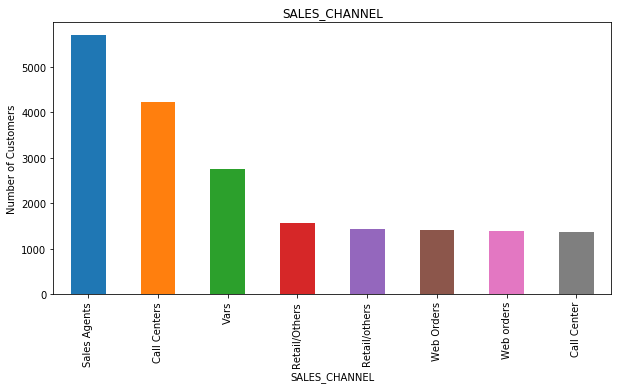

In [29]:
x="SALES_CHANNEL"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

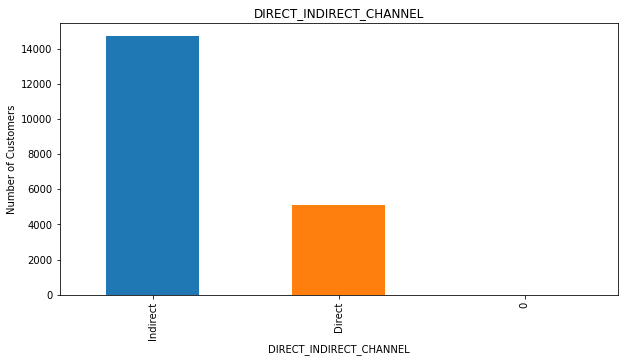

In [30]:
x="DIRECT_INDIRECT_CHANNEL"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

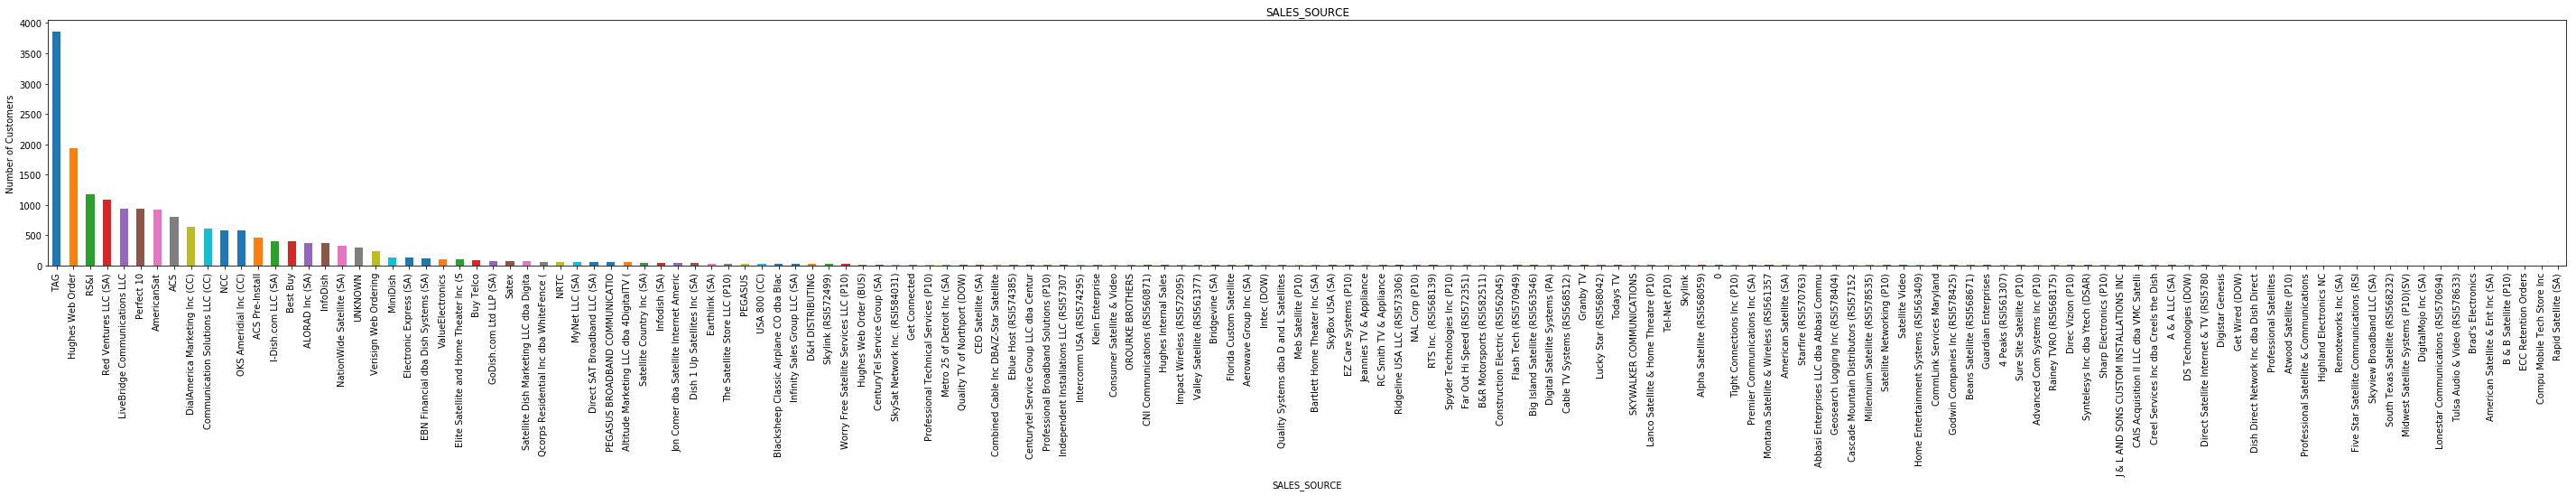

In [31]:
x="SALES_SOURCE"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(50,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

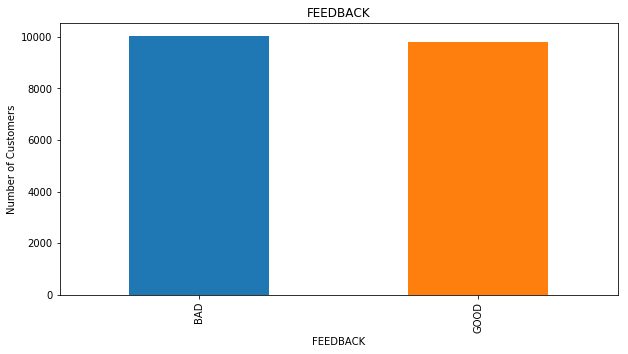

In [32]:
x="FEEDBACK"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

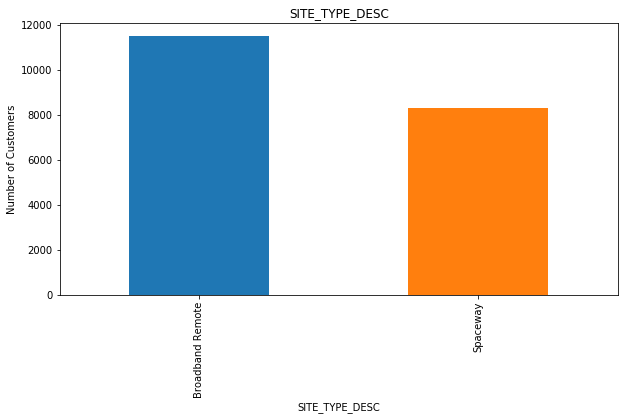

In [33]:
x="SITE_TYPE_DESC"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

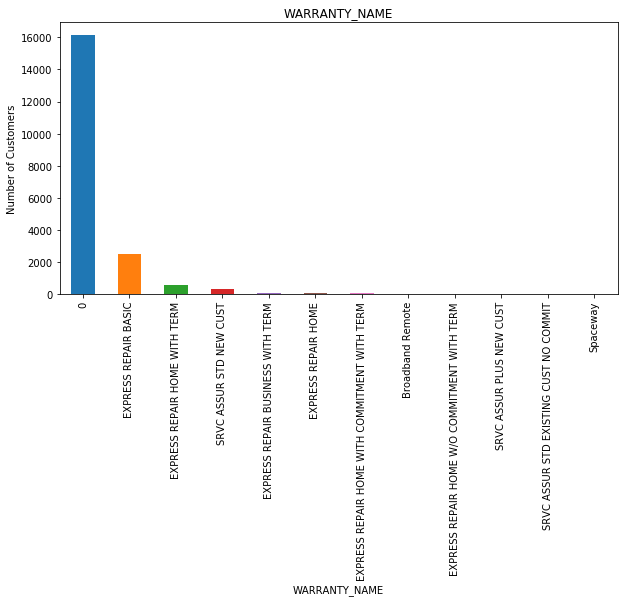

In [34]:
x="WARRANTY_NAME"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

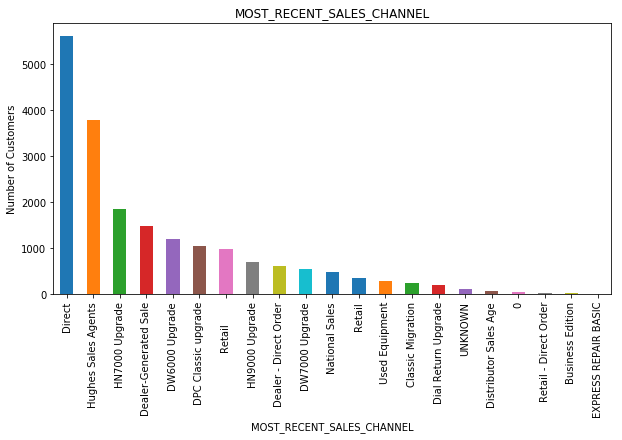

In [35]:
x="MOST_RECENT_SALES_CHANNEL"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

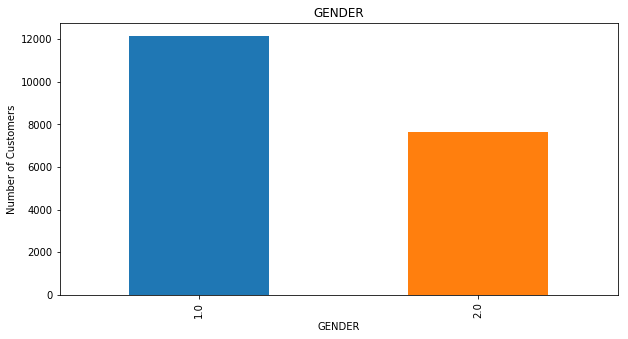

In [36]:
x="GENDER"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

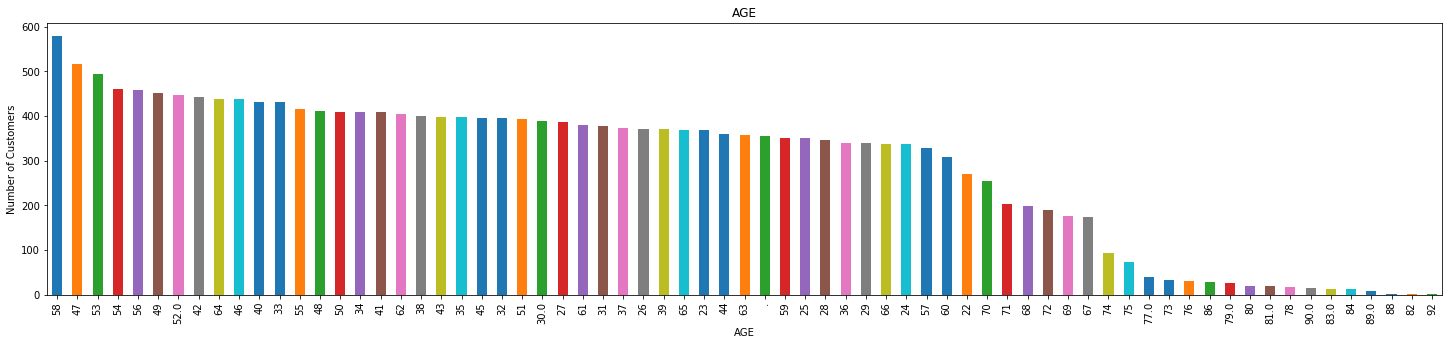

In [37]:
x="AGE"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(25,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

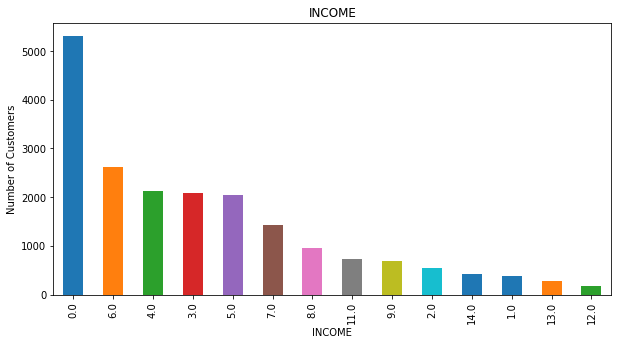

In [38]:
x="INCOME"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

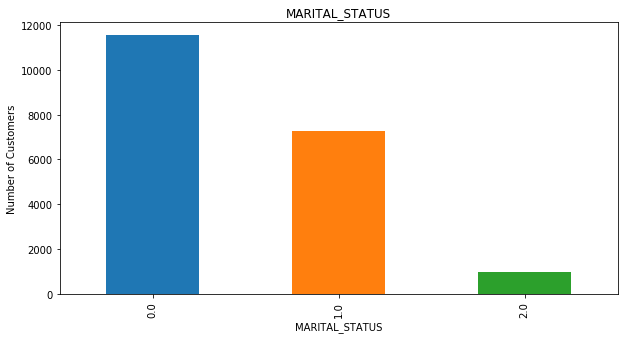

In [39]:
x="MARITAL_STATUS"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

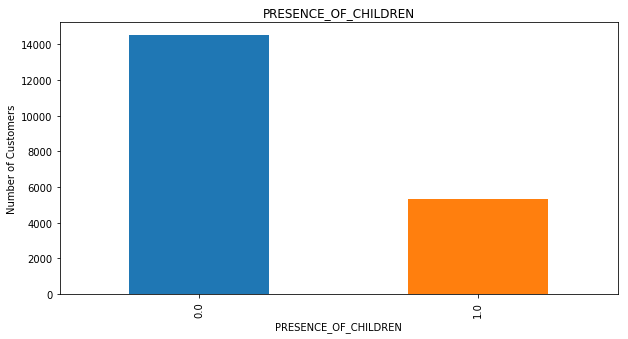

In [40]:
x="PRESENCE_OF_CHILDREN"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers')

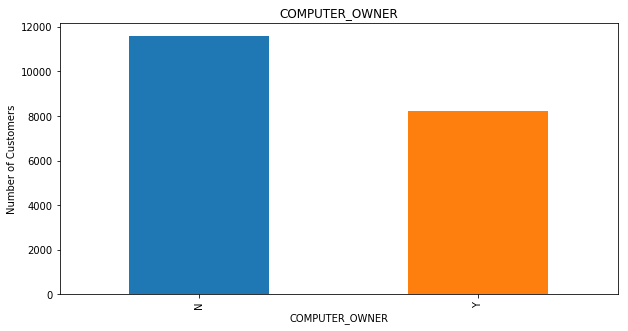

In [41]:
x="COMPUTER_OWNER"
counts=df_copy[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers")

Text(0,0.5,'Number of Customers Churned')

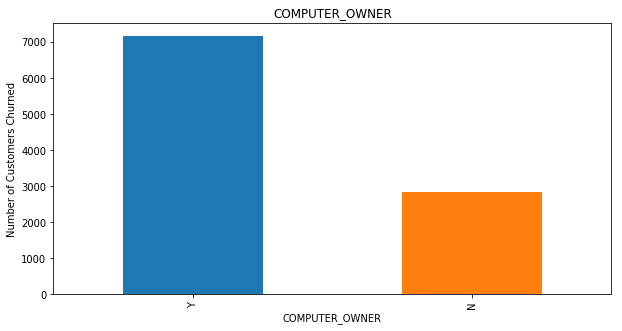

In [42]:
x="COMPUTER_OWNER"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

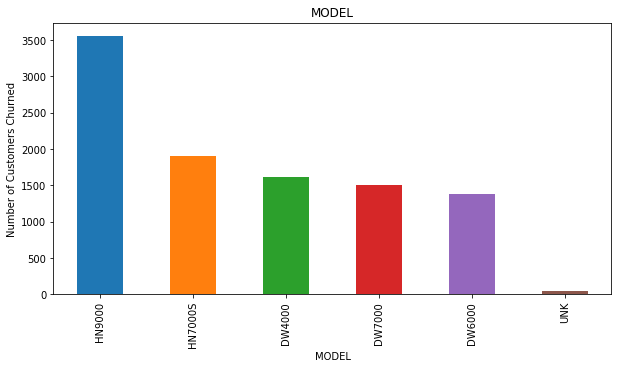

In [43]:
x="MODEL"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

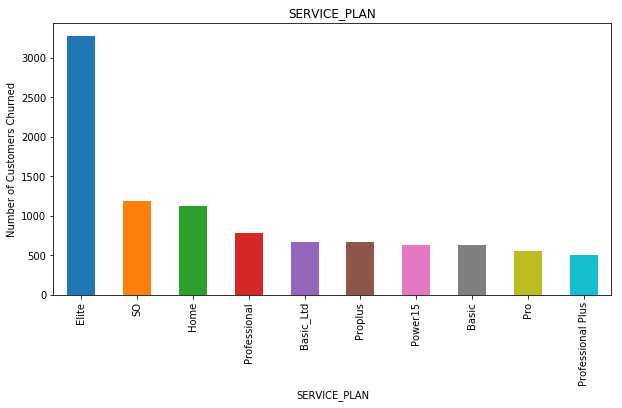

In [44]:
x="SERVICE_PLAN"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

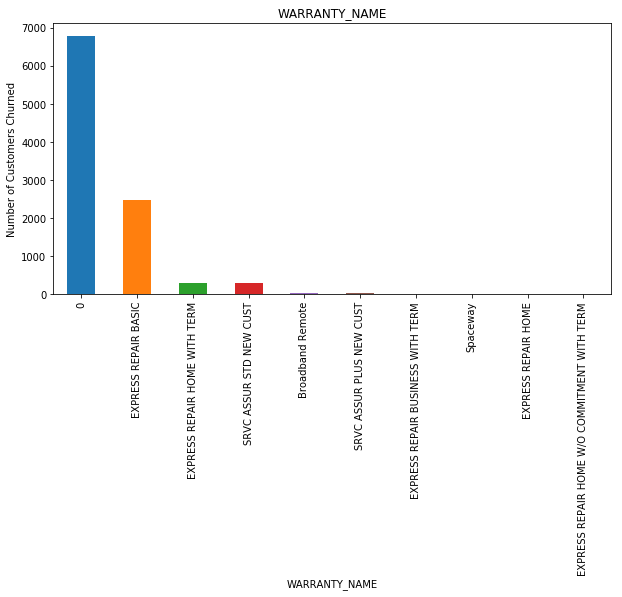

In [45]:
x="WARRANTY_NAME"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

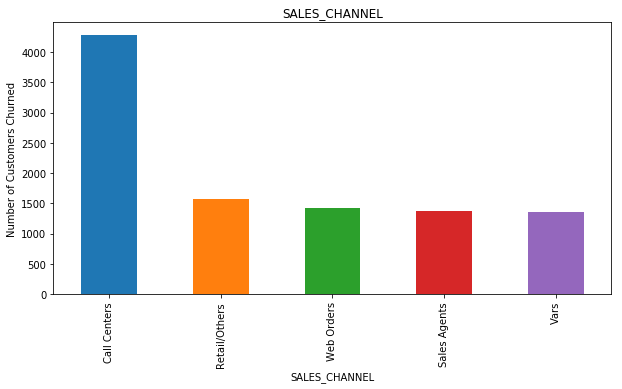

In [46]:
x="SALES_CHANNEL"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

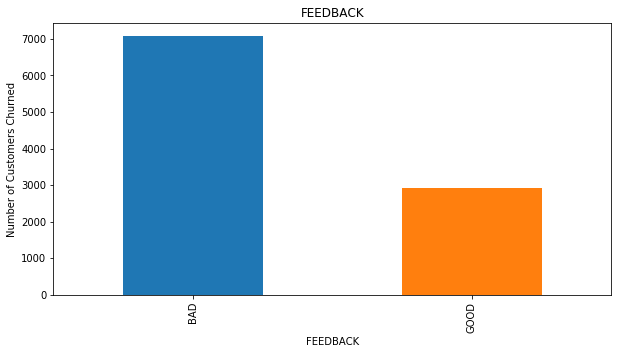

In [47]:
x="FEEDBACK"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

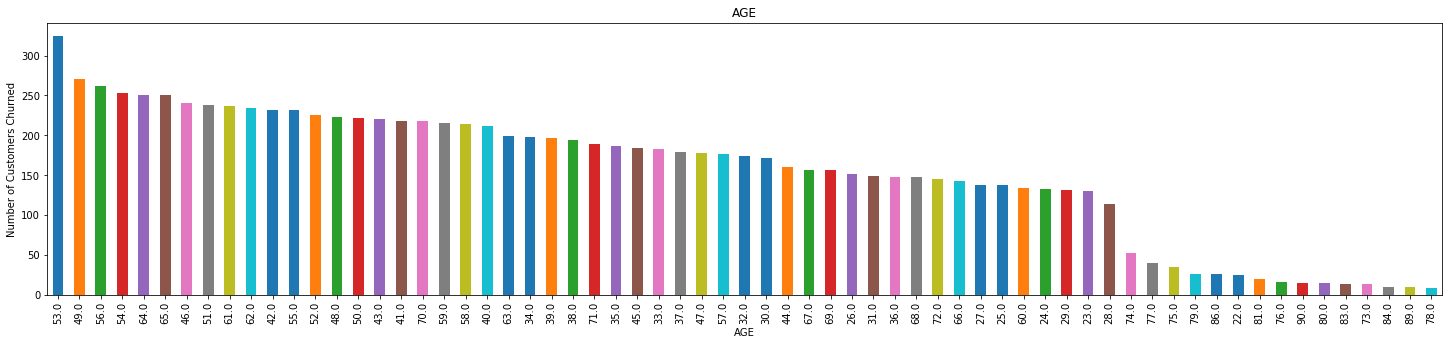

In [48]:
x="AGE"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(25,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

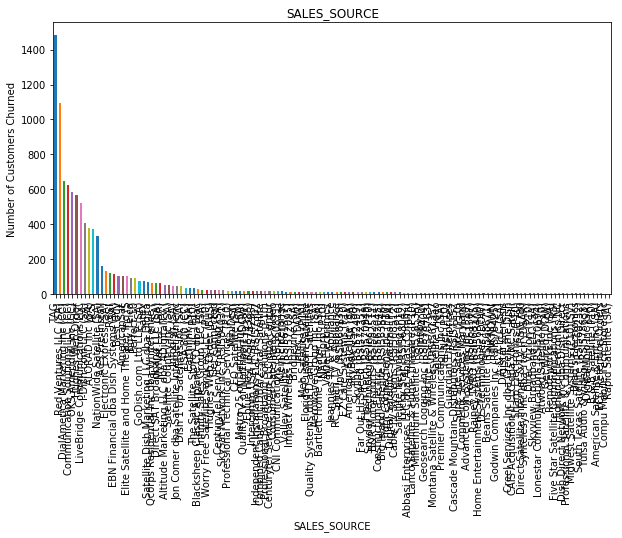

In [49]:
x="SALES_SOURCE"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

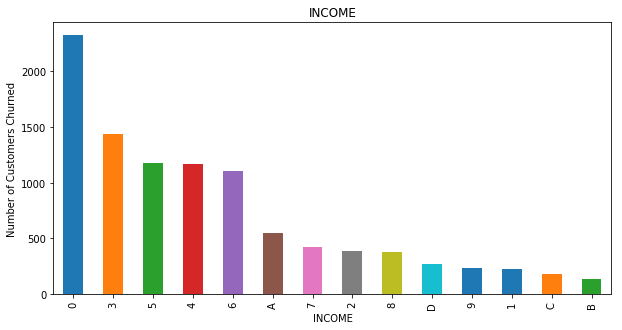

In [50]:
x="INCOME"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

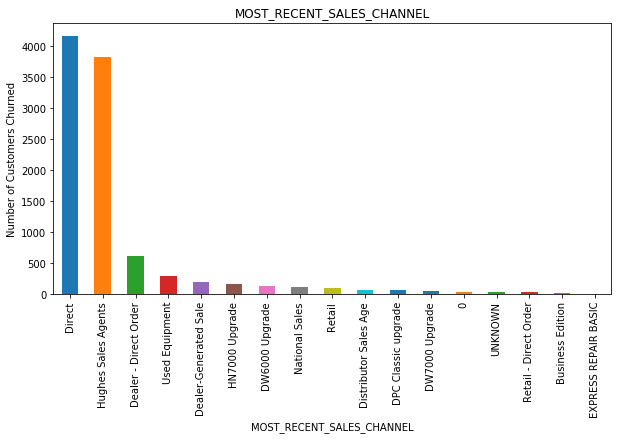

In [51]:
x="MOST_RECENT_SALES_CHANNEL"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

Text(0,0.5,'Number of Customers Churned')

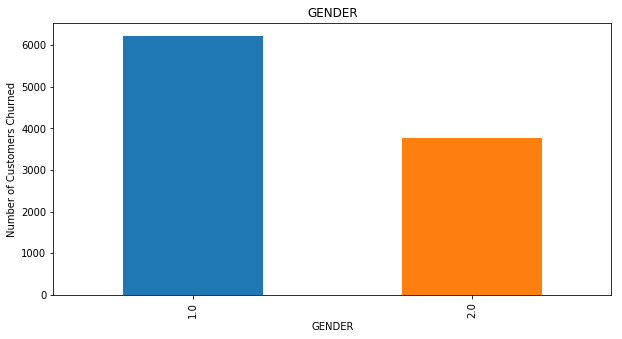

In [52]:
x="GENDER"
counts=churned[x].value_counts()
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title(x)
ax.set_xlabel(x)
ax.set_ylabel("Number of Customers Churned")

In [53]:
df_copy.drop(['SALES_SOURCE','COMPANY_SOURCE_NAME','SATELLITE','MOST_RECENT_SALES_CHANNEL'],axis=1,inplace=True) #Removing the redundant columns 

In [54]:
dep_data=df_copy['ACCOUNT_STATUS'].copy()
curr_val=pd.get_dummies(df_copy['COMPUTER_OWNER'],prefix='COMPUTER_OWNER')
df_copy=df_copy.join(curr_val)
curr_val=pd.get_dummies(df_copy['SERVICE_PLAN'],prefix='SERVICE_PLAN')
df_copy=df_copy.join(curr_val)
curr_val=pd.get_dummies(df_copy['MODEL'],prefix='MODEL')
df_copy=df_copy.join(curr_val)
curr_val=pd.get_dummies(df_copy['SALES_CHANNEL'],prefix='SALES_CHANNEL')
df_copy=df_copy.join(curr_val)
curr_val=pd.get_dummies(df_copy['DIRECT_INDIRECT_CHANNEL'],prefix='DIRECT_INDIRECT_CHANNEL')
df_copy=df_copy.join(curr_val)
curr_val=pd.get_dummies(df_copy['SITE_TYPE_DESC'],prefix='SITE_TYPE_DESC')
df_copy=df_copy.join(curr_val)
curr_val=pd.get_dummies(df_copy['WARRANTY_NAME'],prefix='WARRANTY_NAME')
df_copy=df_copy.join(curr_val)
curr_val=pd.get_dummies(df_copy['FEEDBACK'],prefix='FEEDBACK')
df_copy=df_copy.join(curr_val)
df_copy.drop('FEEDBACK',axis=1,inplace=True)
df_copy.drop(['COMPUTER_OWNER','ACCOUNT_STATUS','SERVICE_PLAN','MODEL','SALES_CHANNEL','DIRECT_INDIRECT_CHANNEL','SITE_TYPE_DESC','WARRANTY_NAME'],axis=1,inplace=True)

In [55]:
for col in df_copy.columns:
    print(df_copy[col].value_counts())

AMR-40439494    1
AMR-91794755    1
AMR-93190126    1
AMR-94070271    1
AMR-41296173    1
AMR-46008837    1
AMR-94212004    1
AMR-49605042    1
AMR-47082422    1
AMR-23569709    1
AMR-23891475    1
AMR-91455409    1
AMR-90171252    1
AMR-41513408    1
AMR-41026801    1
DSS8607324      1
AMR-90880699    1
AMR-23384691    1
DTV-94367392    1
AMR-48187061    1
AMR-49904515    1
AMR-94516674    1
AMR-93317489    1
DSS8834657      1
AMR-92318753    1
AMR-47918711    1
AMR-45670366    1
AMR-27921871    1
AMR-24377687    1
AMR-91983081    1
               ..
AMR-19765638    1
AMR-91309298    1
DTV-93299806    1
AMR-93743464    1
DTV-93711108    1
AMR-17271676    1
AMR-92653444    1
AMR-93613975    1
AMR-27258304    1
AMR-92754910    1
AMR-34671001    1
AMR-33658273    1
AMR-92131998    1
AMR-91279365    1
AMR-41846690    1
AMR-45150501    1
Q-93662037      1
AMR-94656457    1
AMR-24163855    1
Q-93337142      1
DSS9315238      1
AMR-91536263    1
AMR-24081982    1
AMR-42762037    1
AMR-243170

## Feature Selection Phase

### Chi-square test

In [56]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print(freqtab)
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [57]:
ind_data.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_STATUS',
       'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'GENDER', 'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [58]:
compute_freq_chi2(ind_data['SERVICE_PLAN'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS     Active  Closed  Inactive
SERVICE_PLAN                               
Basic                1260     622         3
Basic_Ltd            1265     665         3
Elite                1254    3269         2
Home                 1240    1121         3
Power15                 0     623         0
Power150             1248       0         0
Pro                  1210     555         0
Professional            0     779         0
Professional Plus       0     505         0
Proplus              2508     663         2
SO                      0    1183         0
ChiSquare test statistic:  6974.520482316528
p-value:  0.0


In [59]:
compute_freq_chi2(ind_data['UPGRADE_STATUS'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
UPGRADE_STATUS                          
0.0                  9     879         0
1.0               9976    9106        13
ChiSquare test statistic:  893.1891367380576
p-value:  1.1128671152020977e-194


In [60]:
compute_freq_chi2(ind_data['SALES_CHANNEL'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
SALES_CHANNEL                           
Call Center       1381       0         1
Call Centers         0    4265         0
Retail/Others        0    1576         0
Retail/others     1439       0         6
Sales Agents      4355    1369         4
Vars              1421    1357         0
Web Orders           0    1418         0
Web orders        1389       0         2
ChiSquare test statistic:  13060.720260857575
p-value:  0.0


In [61]:
compute_freq_chi2(ind_data['DIRECT_INDIRECT_CHANNEL'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS           Active  Closed  Inactive
DIRECT_INDIRECT_CHANNEL                          
0                             9       0         0
Direct                     2316    2800         3
Indirect                   7616    7185        10
ChiSquare test statistic:  67.30332767978011
p-value:  8.413799915848283e-14


In [62]:
compute_freq_chi2(ind_data['MODEL'],ind_data['ACCOUNT_STATUS'])


Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
MODEL                                   
DW4000             645    1617         0
DW4020             648       0         7
DW6000             514    1378         0
DW7000             250    1498         1
HN7000S           4967    1897         4
HN9000            1984    3552         1
UNK                977      43         0
ChiSquare test statistic:  5125.459513313986
p-value:  0.0


In [63]:
compute_freq_chi2(ind_data['FEEDBACK'],ind_data['ACCOUNT_STATUS'])


Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
FEEDBACK                                
BAD               3048    7072         5
GOOD              6937    2913         8
ChiSquare test statistic:  3244.7348405455373
p-value:  0.0


In [64]:
compute_freq_chi2(ind_data['INCOME'],ind_data['ACCOUNT_STATUS'])


Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
INCOME                                  
0.0               3048    2324         3
1.0                156     227         0
2.0                169     381         0
3.0                668    1440         1
4.0                960    1170         3
5.0                875    1173         1
6.0               1545    1101         0
7.0               1014     421         1
8.0                595     376         2
9.0                462     234         2
11.0               193     550         0
12.0                43     138         0
13.0                99     179         0
14.0               158     271         0
ChiSquare test statistic:  1270.902424687663
p-value:  9.81659609457288e-252


In [65]:
compute_freq_chi2(ind_data['GENDER'],ind_data['ACCOUNT_STATUS'])


Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
GENDER                                  
1.0               6027    6209         8
2.0               3958    3776         5
ChiSquare test statistic:  6.990400977490026
p-value:  0.030342664464039826


In [66]:
compute_freq_chi2(ind_data['COMPUTER_OWNER'],ind_data['ACCOUNT_STATUS'])


Frequency table
ACCOUNT_STATUS  Active  Closed  Inactive
COMPUTER_OWNER                          
N                 8863    2820        10
Y                 1122    7165         3
ChiSquare test statistic:  7534.816831792754
p-value:  0.0


In [67]:
compute_freq_chi2(ind_data['PRESENCE_OF_CHILDREN'],ind_data['ACCOUNT_STATUS'])

Frequency table
ACCOUNT_STATUS        Active  Closed  Inactive
PRESENCE_OF_CHILDREN                          
0.0                     7945    6661        12
1.0                     2040    3324         1
ChiSquare test statistic:  422.7848724237445
p-value:  1.5611025642641377e-92


### Predictive Modelling Phase

In [68]:
df_copy.drop('SITE_ACCOUNT_NUMBER',axis=1,inplace=True)

In [69]:
temp6=dep_data.replace('Active',1)
dep_data.update(temp6)
temp7=dep_data.replace('Inactive',2)
dep_data.update(temp7)
temp8=dep_data.replace('Closed',0)
dep_data.update(temp8)
temp9=df_copy.replace('.',0)
df_copy.update(temp9)

In [70]:
X_train, X_test, y_train, y_test= train_test_split(df_copy,dep_data,test_size=0.2,random_state=0)

In [71]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [72]:
logreg=LogisticRegression()
rfe = RFE(logreg, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [74]:
y_pred=rfe.predict(X_test)

In [75]:
y_pred=pd.DataFrame(data=y_pred,index=X_test.index)
cm = metrics.confusion_matrix( y_test,y_pred , [1,0] )
cm

array([[1917,   52],
       [  62, 1931]], dtype=int64)

Text(0.5,15,'Predicted label')

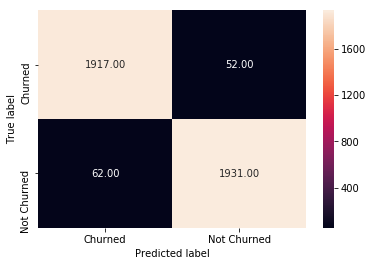

In [76]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churned", "Not Churned"] , yticklabels = ["Churned", "Not Churned"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [77]:
metrics.accuracy_score( y_test, y_pred )

0.970736629667003